<a href="https://colab.research.google.com/github/wlgus9/Machine_Learning/blob/main/3%EC%9E%A5_%EB%B6%84%EB%A5%98%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, 2:]
y = data.target
feature_names = data.feature_names[2:]

#DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=1,
                                  random_state=0)
dt_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [ ]:
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

In [ ]:
def draw_decision_tree(model, feature_names=feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

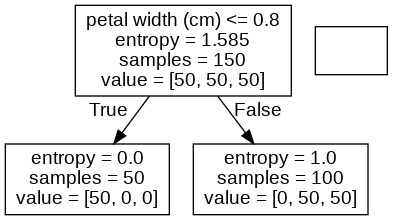

In [ ]:
draw_decision_tree(dt_model, feature_names=data.feature_names[2:])

In [ ]:
dt_model5 = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=5,
                                  random_state=0)
dt_model5.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

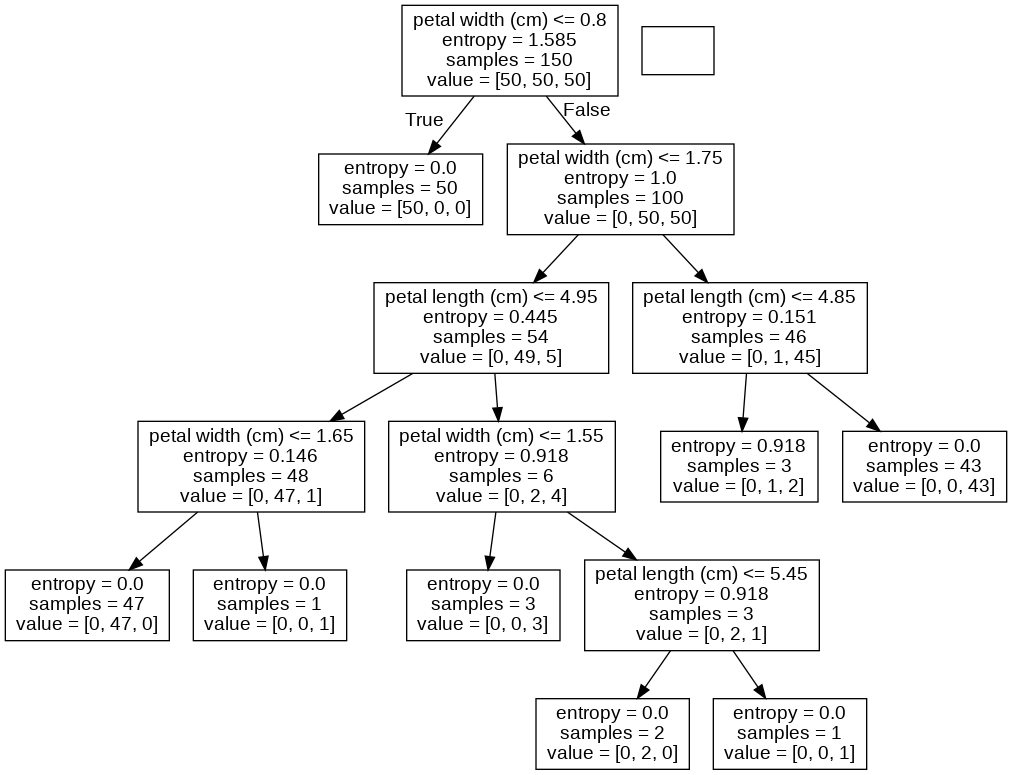

In [ ]:
draw_decision_tree(dt_model5, feature_names=data.feature_names[2:])

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, 2:]
y = data.target
feature_names = data.feature_names[2:]
dt_model6 = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=6,
                                  random_state=0)
dt_model6.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

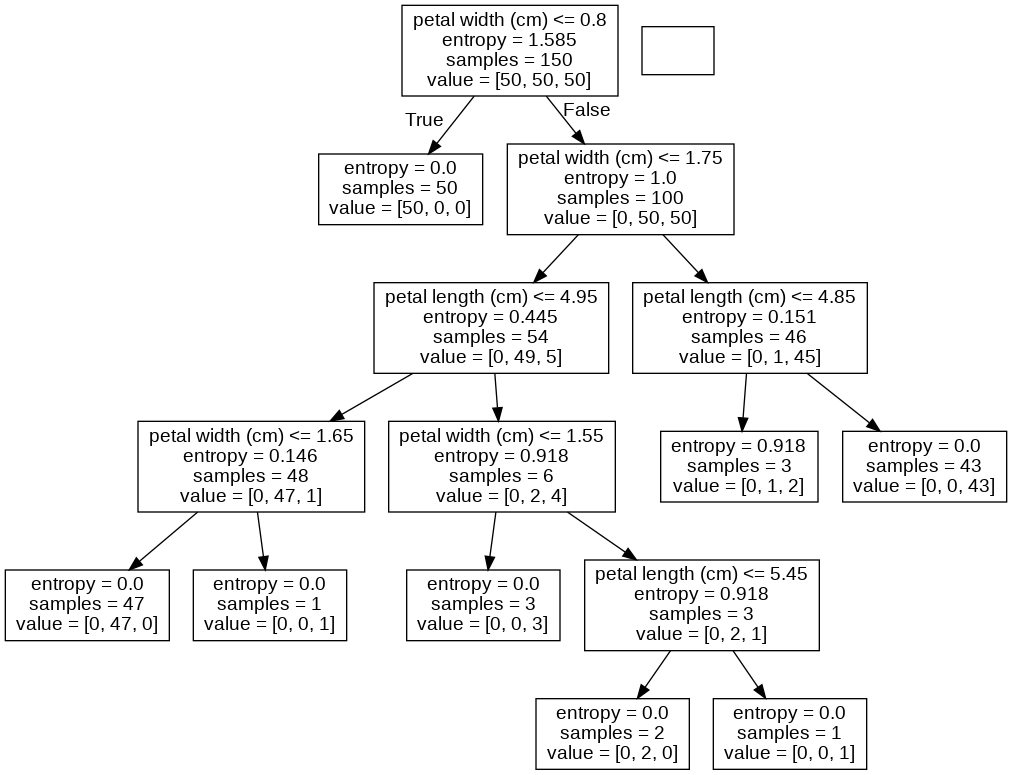

In [ ]:
draw_decision_tree(dt_model6, feature_names=data.feature_names[2:])

#Perceptron

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
idx = np.in1d(iris.target, [0,2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

In [ ]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=100, random_state=1).fit(X, y)

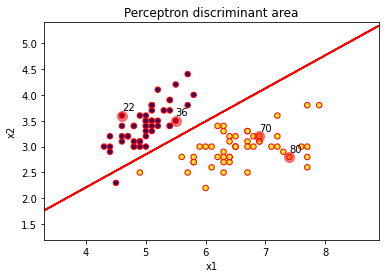

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

X_min, X_max = X[:, 0].min()-1, X[:, 0].max()+1 #x축의 한계
Y_min, Y_max = X[:, 1].min()-1, X[:, 1].max()+1 #y축의 한계

XX, YY = np.meshgrid(np.linspace(X_min, X_max, 1000),
                     np.linspace(Y_min, Y_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

plt.contour(XX, YY, ZZ, colors='r')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='r', linewidth=1)

idx = [22, 36, 70, 80]
plt.scatter(X[idx, 0], X[idx, 1], c='r', s=100, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.1))
plt.title('Perceptron discriminant area')    
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


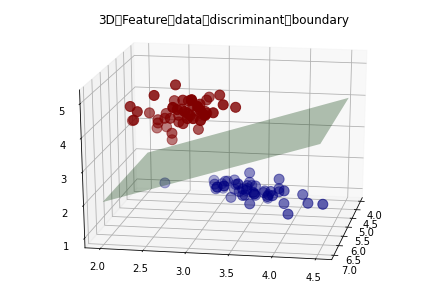

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y  = iris.target
idx	= np.logical_or(iris.target == 0, iris.target == 1)
X	=	iris.data[idx,	:3]
y	=	iris.target[idx]
from	mpl_toolkits.mplot3d	import	Axes3D
import	matplotlib	as	mpl
import	matplotlib.pyplot	as	plt
%matplotlib	inline
fig	=	plt.figure()
ax	=	Axes3D(fig,	elev=20,	azim=10)
ax.scatter(X[:,	0],	X[:,	1],	X[:,	2],	
											c=y,	marker='o',	s=100,	cmap=mpl.cm.jet)
ax.plot_surface(np.array([[4,	4],	[7,	7]]),	np.array([[2,	4.5],	[2,	4.5]]),
																np.array([[2,	4],	[2,	4]]),	color='g',	alpha=.3)
plt.title("3D	Feature	data	discriminant	boundary")
plt.show()


#MLPClassifier

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 30), max_iter=500)
mlp.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(50, 50, 30), max_iter=500)

In [ ]:
import pandas as pd
pred = mlp.predict(test_X)
pd.crosstab(test_y, pred)

col_0,0,1,2
row_0,,,
0,14,0,0
1,0,18,0
2,0,0,13


In [ ]:
mlp.score(test_X, test_y)

1.0

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2*rng.uniform(size=X.shape)

datasets = [make_moons(noise=0.3, random_state=0), #arc
            make_circles(noise=0.2, factor=0.5, random_state=1),#circle
            (X, y) #linear
            ]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

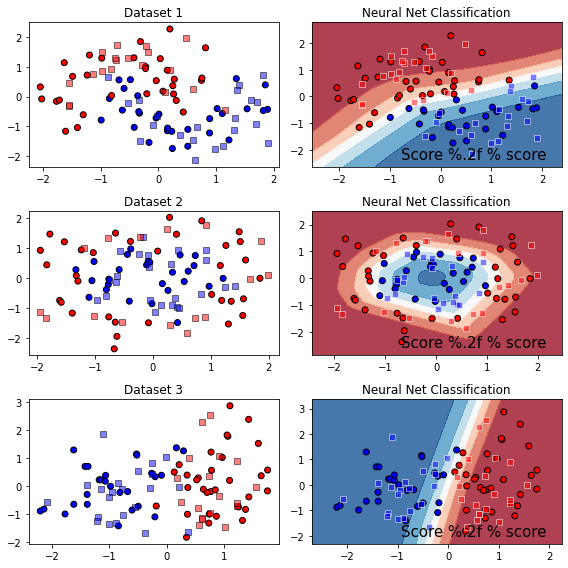

In [ ]:
figure = plt.figure(figsize=(8, 8))

#데이터셋들마다 반복
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    #데이터셋을 그리기 위한 설정
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    ax = plt.subplot(len(datasets), 2, 2*ds_cnt+1)
    ax.set_title('Dataset %d' % (ds_cnt+1))

    #학습 데이터의 산점도
    ax.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=cm_bright, edgecolors='k')

    #검증 데이터의 산점도
    ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=cm_bright, edgecolors='k', marker='s', alpha=0.5)

    ax = plt.subplot(len(datasets), 2, 2*ds_cnt+2)

    #분류모형 생성 및 예측
    model = MLPClassifier(alpha=1, max_iter=1000)
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    score = model.score(test_X, test_y)

    #결정 경계를 그리기 위함
    if hasattr(model, 'decision_function'):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    #채워진 등고선을 이용한 결정 경계 시각화
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    #학습 데이터의 분류 예측 결과를 산점도로 시각화
    ax.scatter(train_X[:, 0], train_X[:, 1], c=train_pred, cmap=cm_bright, edgecolors='k')

    #검증 데이터의 분류 예측 결과를 산점도로 시각화
    ax.scatter(test_X[:, 0], test_X[:, 1], c=test_pred, cmap=cm_bright, edgecolors='w', marker='s', alpha=0.5)

    ax.set_title('Neural Net Classification')
    ax.text(xx.max() - .3, yy.min() + .3,
            ('Score %.2f % score').lstrip('0'),
            size=15, horizontalalignment='right')
    
plt.tight_layout()    
plt.show()

#ROC 커브를 이용한 성능 비교

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X, y)
pred1 = model1.predict(X)

In [ ]:
from sklearn.svm import SVC
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
pred2 = model2.predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred1)) #LogisticRegression
print()
print(confusion_matrix(y, pred2))#SVC

[[940   3]
 [ 30  27]]

[[940   3]
 [ 30  27]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, pred1)) #LogisticRegression
print()
print(classification_report(y, pred2))#SVC

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



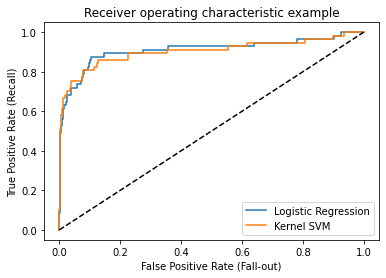

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds2 = roc_curve(y, model2.decision_function(X))
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='Kernel SVM')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label='random quess')
plt.xlabel('False Positive Rate (Fall-out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

#AUC(Area Under the Curve)

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X, y)

In [ ]:
from sklearn.svm import SVC
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)

In [ ]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds2 = roc_curve(y, model2.decision_function(X))

In [ ]:
from sklearn.metrics import auc #Fall-out 대비 Recall 값이 클 수록 AUC가 1에 가까움 --> 민감한 모형
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

#다중 클래스의 ROC 커브

다중 클래스에 대해서는 ROC 커브를 그릴 수 없음  
그래서 각각의 클래스에 대해 OvR 문제를 가정 --> 각각의 OvR 문제에 대해 ROC 커브를 그림

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, classes=[0, 1, 2])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

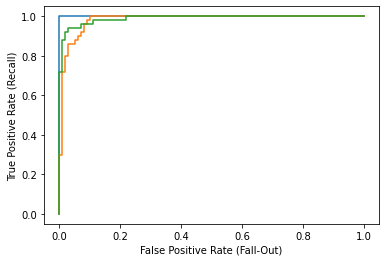

In [ ]:
for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')    
plt.ylabel('True Positive Rate (Recall)')    
plt.show()

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 30))

In [ ]:
mlp.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(50, 50, 30))

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y, pred))
# print('Accuracy : ', confusion_matrix(y, pred))

NameError: ignored